In [0]:
from zipfile import ZipFile
filename = "cifar-10-batches-py.zip"

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('Done')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def unpickle(file):
    with open(file,'rb') as f:
        data = pickle.load(f,encoding='latin-1')
        return data

def load_cifar10_data(data_dir):
    train_data = None
    train_labels = []
    for i in range(1,6):
        data_dic = unpickle(data_dir+"/data_batch_{}".format(i))
        if i == 1:
            train_data = data_dic['data']
        else:
            train_data = np.vstack((train_data,data_dic['data']))
        train_labels +=data_dic['labels']
    
    test_data_dic = unpickle(data_dir+"/test_batch")
    test_data = test_data_dic['data']
    test_labels = test_data_dic['labels']
    
    train_data = train_data.reshape((len(train_data),3,32,32))
    train_data = np.rollaxis(train_data,1,4)
    train_labels = np.array(train_labels)
    
    test_data = test_data.reshape((len(test_data),3,32,32))
    test_data = np.rollaxis(test_data,1,4)
    test_labels = np.array(test_labels)
    
    return train_data,train_labels,test_data,test_labels 

In [0]:
data_dic = unpickle("cifar-10-batches-py//" + "/data_batch_1")

In [0]:
# import the necessary pacakges
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import add
from keras.models import Model
from tensorflow import  keras


from keras.optimizers import Adam
from keras.datasets import cifar10
import keras.utils as np_utils

from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
print(tf.test.is_built_with_cuda())
import cv2
import pickle

In [0]:
data_dir = "cifar-10-batches-py//"
trainX,trainY,testX,testY = load_cifar10_data(data_dir)

print(trainX.shape)
print(trainY.shape)

print(testX.shape)
print(testY.shape)

# In order to check where the data shows an image correctly
plt.imshow(trainX[2])
plt.show()

In [0]:
# perform categorical encoding
trainY = np_utils.to_categorical(trainY,10)
testY = np_utils.to_categorical(testY,10)

In [0]:
# vectorize the data
trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0

In [0]:
# Split the data into training and validation data
valX = trainX[:10000]
trainX = trainX[10000:]
valY = trainY[:10000]
trainY = trainY[10000:]


In [0]:
# Build the sequential model
inputShape = Input(shape = (32,32,3))

layer1 = Conv2D(32,(3,3),padding='same',activation='relu')(inputShape)
layer1 = MaxPooling2D(pool_size=(2,2))(layer1)
layer1 = Dropout(0.5)(layer1)

layer2 = Conv2D(64,(3,3),padding='same',activation='relu')(layer1)
layer2 = MaxPooling2D(pool_size=(2,2))(layer2)
layer2 = Dropout(0.5)(layer2)

layer3 = Conv2D(64,(3,3),padding='same',activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(2,2))(layer3)
layer3 = Dropout(0.5)(layer3)

output = Flatten()(layer3)
output = Dense(64,activation='relu')(output)
out = Dense(10,activation='softmax')(output)

model = Model(inputs = inputShape,outputs = out)

In [0]:
# Compile the model
adam = Adam(lr=0.001)
model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator()
result = model.fit_generator(trainGen.flow(trainX,trainY,batch_size = 512),
                             validation_data = (valX,valY),
                             epochs=60,
                             steps_per_epoch= len(trainX)//512,
                             workers=20)

In [0]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss') # blue dots
plt.plot(epochs,val_loss,'b',label='Validation loss') # blue line
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training and validation accuracy
plt.clf()
acc_values = result.history['accuracy']
val_acc_values = result.history['val_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
predict = model.evaluate(testX,testY,verbose=1)
print("Test Accuracy :",predict[1])
print("Test Loss :",predict[0])


In [0]:
# Save the model
model.save('CIFAR10.hdf5')

In [0]:
# Load the model weights
model.load_weights('CIFAR10.hdf5')

In [0]:
# Display and verify the training data
plt.imshow(testX[10])

In [0]:
# Make a prediction
model.predict(testX[10:11])

In [0]:
# Build the sequential model with inception block
inputShape = Input(shape = (32,32,3))

layer1 = Conv2D(32,(3,3),padding='same',activation='relu')(inputShape)
layer1 = MaxPooling2D(pool_size=(2,2))(layer1)

layer2 = Conv2D(64,(3,3),padding='same',activation='relu')(layer1)
layer2 = MaxPooling2D(pool_size=(2,2))(layer2)

layer3 = Conv2D(64,(3,3),padding='same',activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(2,2))(layer3)

layer4 = Conv2D(64,(3,3),padding='same',activation='relu')(layer3)
layer4 = BatchNormalization()(layer4)
layer4 = MaxPooling2D(pool_size=(2,2))(layer4)
layer4 = Dropout(0.5)(layer4)

block1_1 = Conv2D(64, (1,1), activation='relu', padding='same')(layer4)
block1_1 = Conv2D(64, (3,3), activation='relu', padding='same')(block1_1)
block1_1 = Dropout(0.5)(block1_1)

block1_2 = MaxPooling2D((3,3), strides = (1,1), padding='same')(layer4)
block1_2 = Conv2D(64, (1,1), activation='relu', padding='same')(block1_2)
block1_2 = Dropout(0.5)(block1_2)

block1 = concatenate([block1_1, block1_2], axis=3)
block1 = BatchNormalization()(block1)

output = Flatten()(block1)
out = Dense(10,activation='softmax')(output)

model = Model(inputs = inputShape,outputs = out)

In [0]:
model.summary()

In [0]:
# Compile the model
adam = Adam(lr=0.001)
model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [0]:
# Train the model with 1000 epochs
result = model.fit_generator(trainGen.flow(trainX,trainY,batch_size = 512),
                             validation_data = (valX,valY),
                             epochs = 60,
                             steps_per_epoch= len(trainX)//512,
                             workers = 20)
results=model.evaluate(testX,testY)
print(results)

In [0]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss') # blue dots
plt.plot(epochs,val_loss,'b',label='Validation loss') # blue line
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training and validation accuracy
plt.clf()
acc_values = result.history['accuracy']
val_acc_values = result.history['val_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
predict = model.evaluate(testX,testY,verbose=1)
print("Test Accuracy :",predict[1])
print("Test Loss :",predict[0])

In [0]:
# Save the model
model.save('CIFAR10_inception.hdf5')

In [0]:
# Load the model weights
model.load_weights('CIFAR10_inception.hdf5')

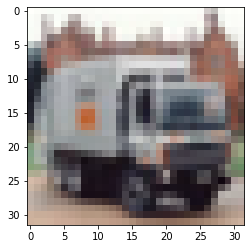

In [90]:
# Display and verify the training data
plt.imshow(testX[11])

In [0]:
# Make a prediction
model.predict(testX[11:12])

In [0]:
# Build the sequential model with residual block
from keras.layers import add
from keras.layers.convolutional import AveragePooling2D
inputShape = Input(shape = (32,32,3))

layer1 = Conv2D(32,(3,3),padding='same',activation='relu')(inputShape)
layer1 = MaxPooling2D(pool_size=(2,2))(layer1)

layer2 = Conv2D(64,(3,3),padding='same',activation='relu')(layer1)
layer2 = MaxPooling2D(pool_size=(2,2))(layer2)

layer3 = Conv2D(64,(3,3),padding='same',activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(2,2))(layer3)

layer4 = Conv2D(64,(3,3),padding='same',activation='relu')(layer3)
layer4 = BatchNormalization()(layer4)

layer4 = Dropout(0.5)(layer4)

layer5 = Conv2D(64,(3,3),padding='same',activation='relu')(layer4)
layer5 = BatchNormalization()(layer5)

layer5 = Dropout(0.5)(layer5)

layer6 = Conv2D(64,(3,3),padding='same',activation='relu')(layer5)
layer6 = BatchNormalization()(layer6)

layer6 = Dropout(0.5)(layer6)
layer6 = add([layer6,layer2])

output = Flatten()(layer6)
out = Dense(10,activation='softmax')(output)

model = Model(inputs = inputShape,outputs = out)


In [0]:
model.summary()

In [0]:
# Compile the model
adam = Adam(lr=0.001)
model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [0]:
# Train the model with 1000 epochs
result = model.fit_generator(trainGen.flow(trainX,trainY,batch_size = 512),
                             validation_data = (valX,valY),
                             epochs = 40,
                             steps_per_epoch= len(trainX)//512,
                             workers = 20)

In [0]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss') # blue dots
plt.plot(epochs,val_loss,'b',label='Validation loss') # blue line
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training and validation accuracy
plt.clf()
acc_values = result.history['accuracy']
val_acc_values = result.history['val_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
predict = model.evaluate(testX,testY,verbose=1)
print("Test Accuracy :",predict[1])
print("Test Loss :",predict[0])

In [0]:
# Save the model
model.save('CIFAR10_residual.hdf5')

In [0]:
# Load the model weights
model.load_weights('CIFAR10_residual.hdf5')

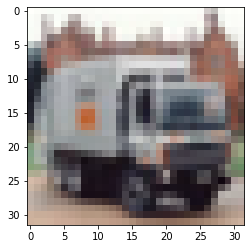

In [112]:
# Display and verify the training data
plt.imshow(testX[11])

In [0]:
# Make a prediction
model.predict(testX[11:12])